In [132]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd() , "..")))
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [133]:
print(sys.path)

['C:\\Users\\Admin\\anaconda3\\python311.zip', 'C:\\Users\\Admin\\anaconda3\\DLLs', 'C:\\Users\\Admin\\anaconda3\\Lib', 'C:\\Users\\Admin\\anaconda3', 'c:\\Country_Clustering_Project_CNS\\venv', '', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\win32', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\Pythonwin', 'c:\\Country_Clustering_Project_CNS', 'c:\\Country_Clustering_Project_CNS', 'c:\\Country_Clustering_Project_CNS']


In [134]:
# import sys, os
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))


In [135]:
from src.data_loader import load_data
from src import config

In [136]:
csv_path = os.path.abspath(os.path.join("..", config.SET_PATH_DATA))
df = pd.read_csv(csv_path)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [137]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [139]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [140]:
df_use = df.copy(deep= True) # Dùng cho sau này

## EDA

In [141]:
df_ve = df.copy(deep = True)
df_ve.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [142]:
df_ve.drop("country" , axis = 1 , inplace = True)
print(df_ve.columns , f"Tổng số lượng cột là {len(df_ve.columns)}")

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object') Tổng số lượng cột là 9


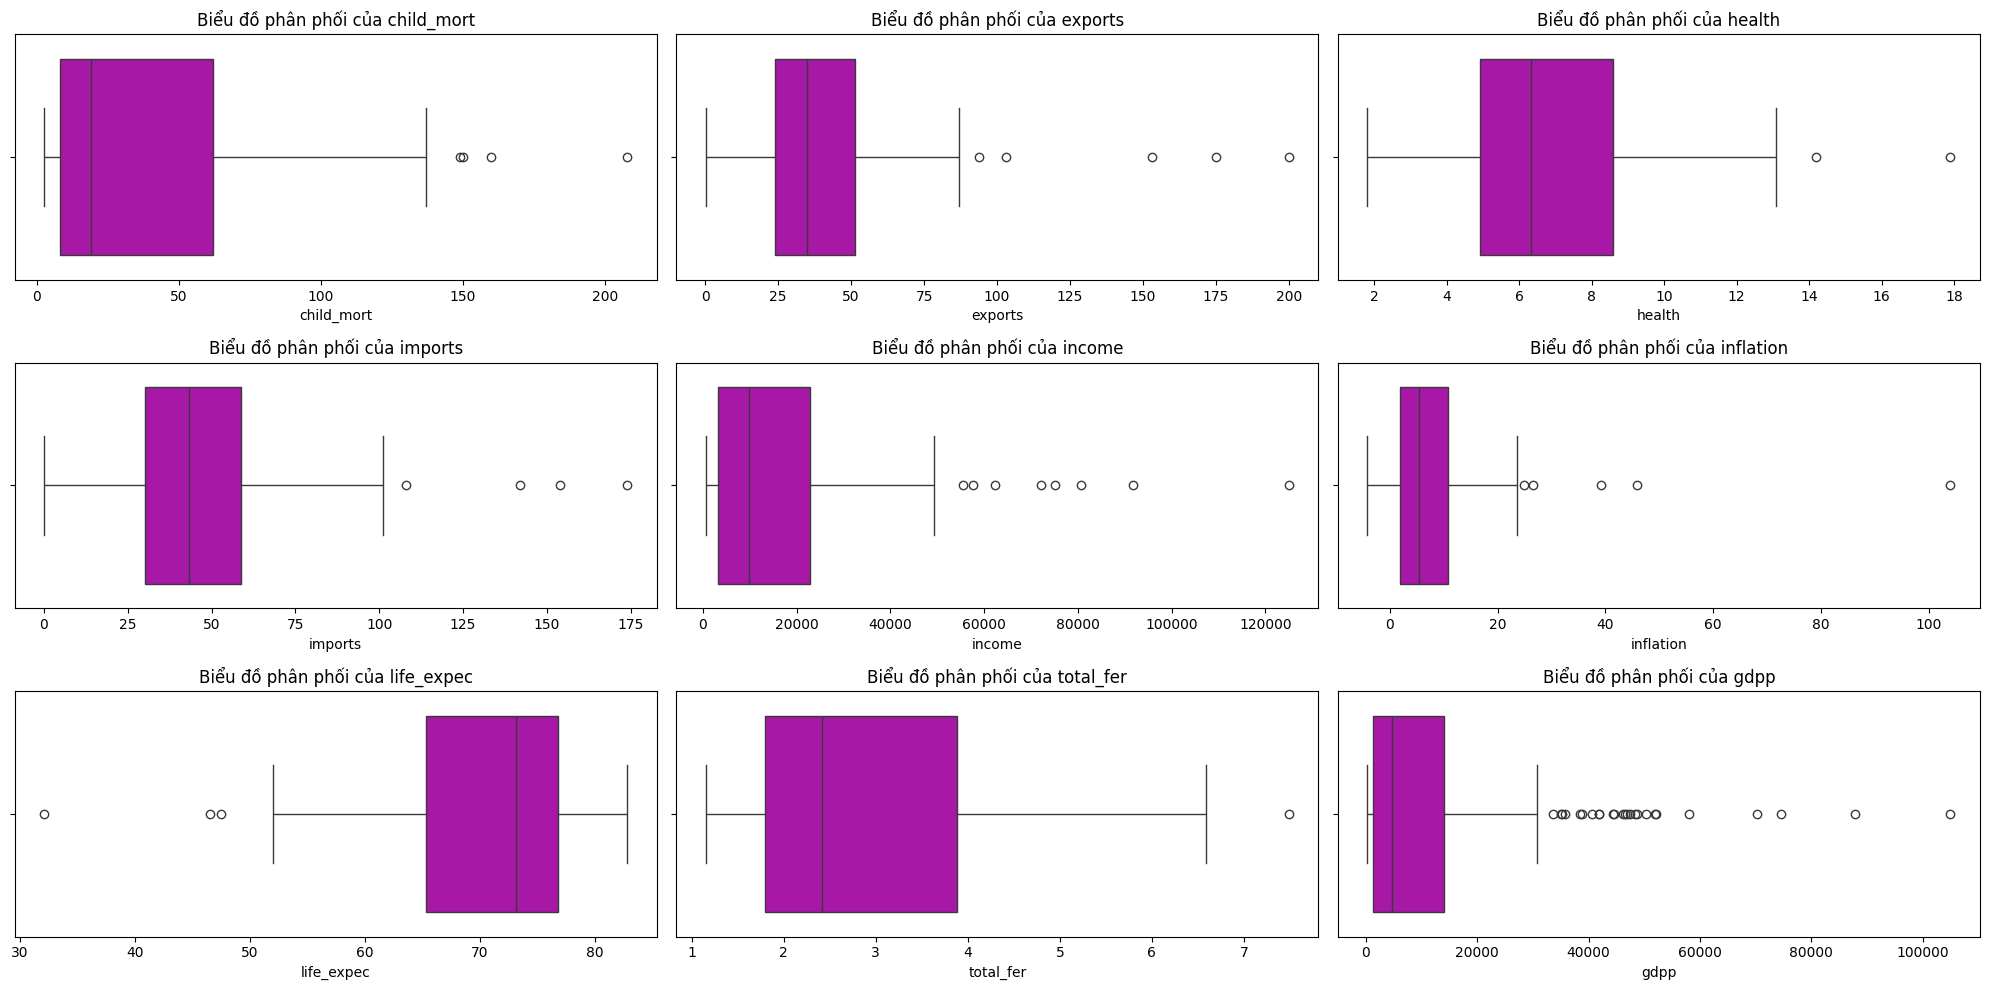

In [143]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve):
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.boxplot(X , ax = axes , color = 'm' , orient='h')
        title = X.name 
        axes.set_title(f"Biểu đồ phân phối của {title}")
plt.tight_layout()

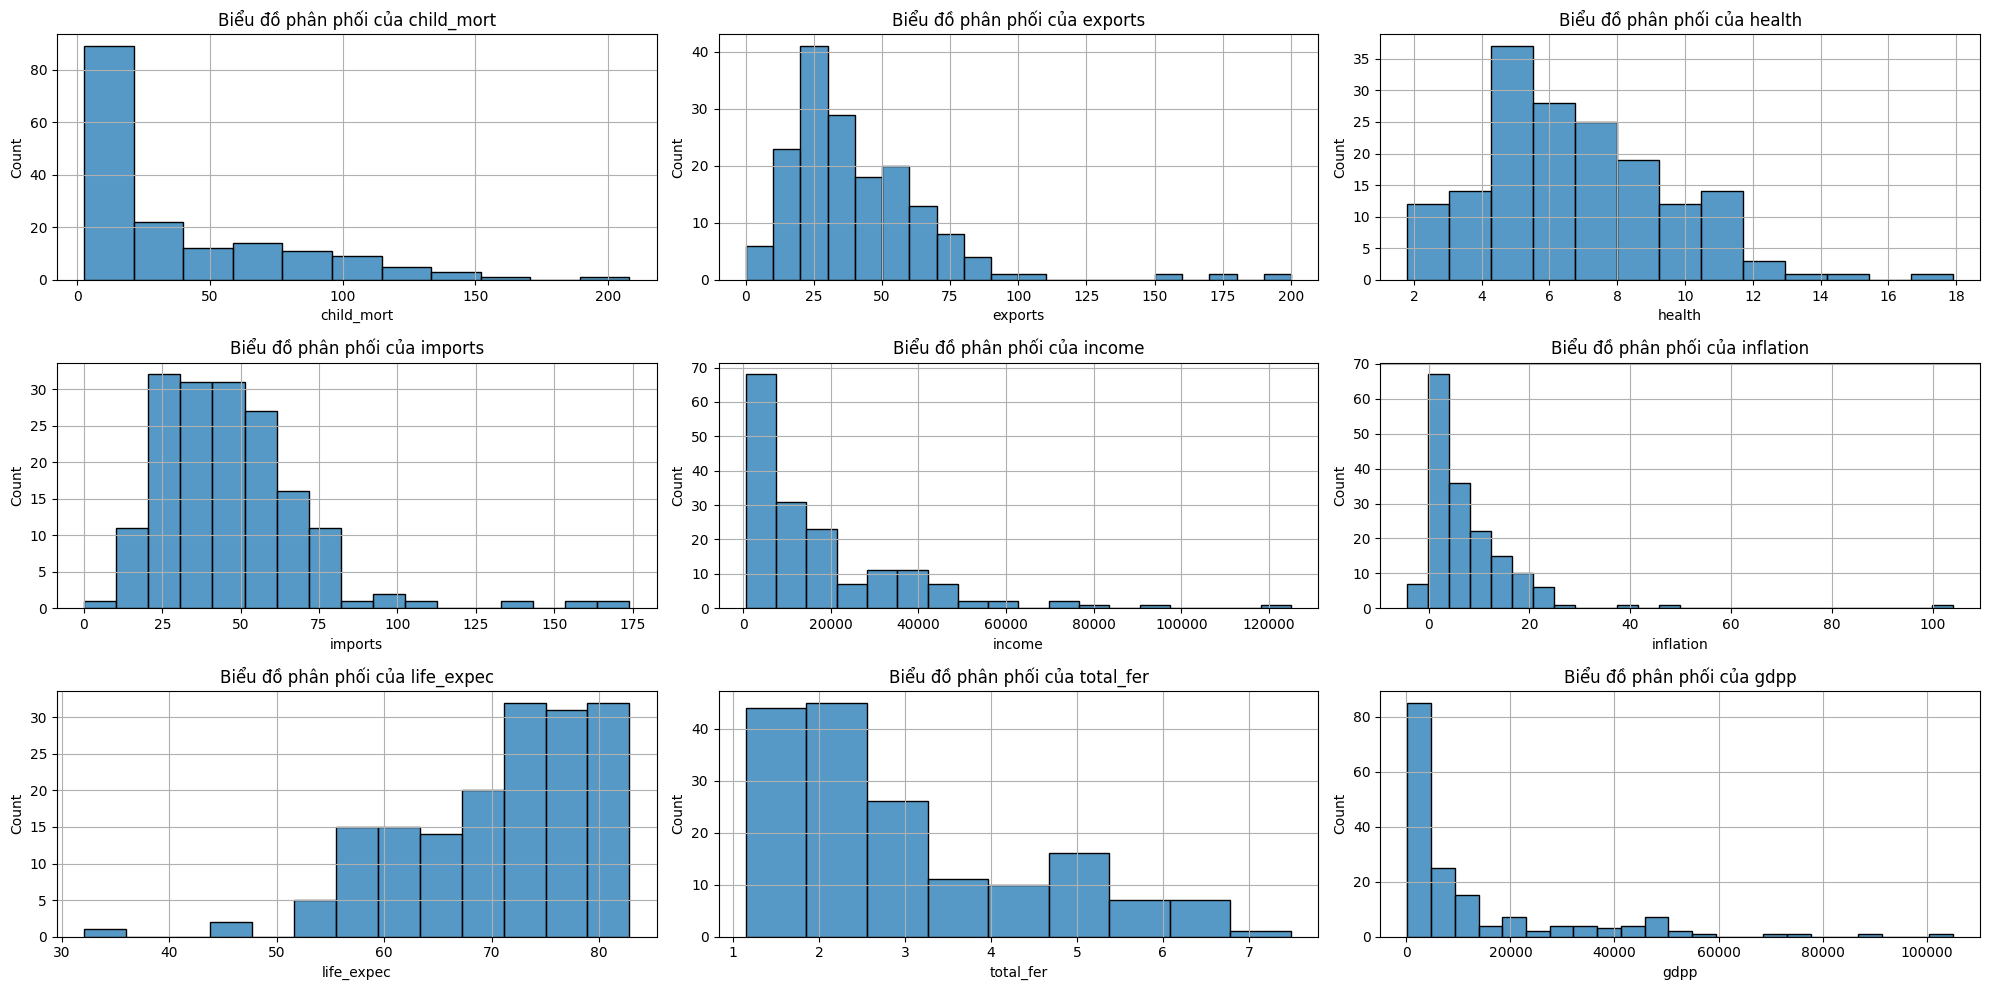

In [144]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve): 
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.histplot(X , ax = axes)
        axes.grid()
        title = X.name
        axes.set_title(f"Biểu đồ phân phối của {title}")
plt.tight_layout()
        

## Phân bố dữ liệu

- **Health**: Phân phối gần với chuẩn, với đỉnh ở khoảng 4–5.
- **Life expectancy**: Phân phối lệch trái – phần lớn quốc gia có tuổi thọ cao, một số ít thấp.
- Các chỉ số còn lại (**child mortality**, **exports**, **imports**, **income**, **inflation**, **total fertility**, **GDP**) đều **lệch phải**, với đỉnh ở mức thấp và đuôi kéo dài về phía các giá trị cao.

## Tình trạng kinh tế và xã hội

- **Thu nhập bình quân đầu người** rất thấp (đa số dưới 2000 USD).
- **GDP bình quân đầu người** cũng thấp – phản ánh sự giàu có thấp.
- **Của cải và thu nhập** phân bổ không đồng đều, thể hiện rõ qua các giá trị ngoại lệ cao.
- **Mức sống** không đồng đều giữa các quốc gia – thể hiện qua sự chênh lệch lớn trong thu nhập và tuổi thọ trung bình.

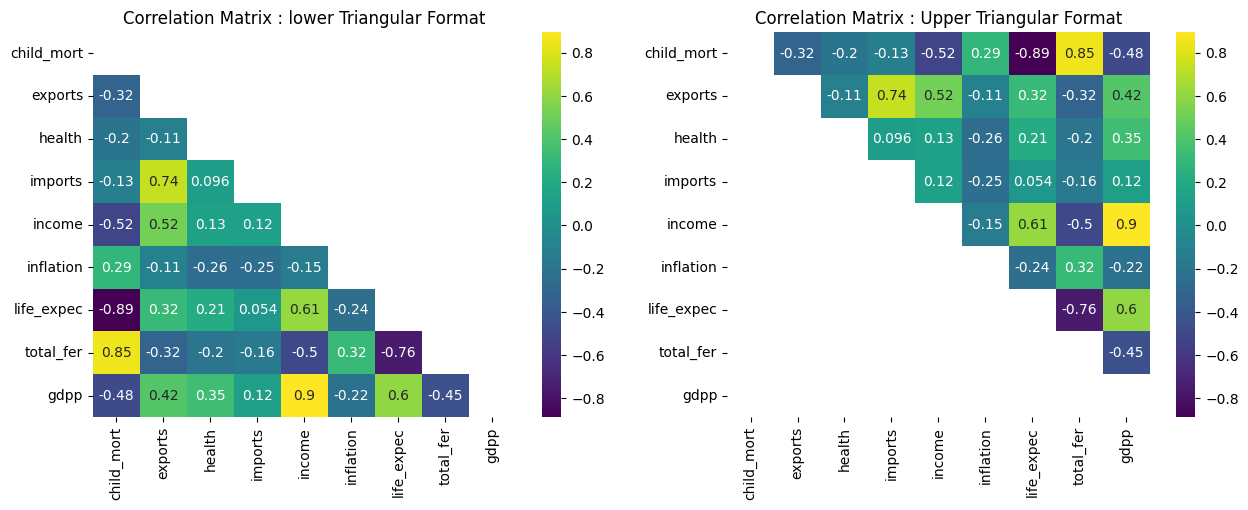

In [145]:
upper_triangle = np.tril(df_ve.corr())
lower_triangle = np.triu(df_ve.corr())

fig , ax = plt.subplots(1,2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df_ve.corr() , mask = lower_triangle , annot=True , cmap = "viridis" , cbar= True)
plt.title('Correlation Matrix : lower Triangular Format')
plt.subplot(1,2,2 )
sns.heatmap(df_ve.corr() , cmap = 'viridis' , annot= True , mask =upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')
plt.show()

## 🧠 Phân tích mối quan hệ giữa các đặc trưng và tình trạng quốc gia

### 📉 Ảnh hưởng của điều kiện kinh tế đến sức khỏe và dân số

- **Tỷ lệ trẻ tử vong cao** thường xảy ra khi:
  - `income`, `life_expec`, `gdpp`, `exports` **giảm**.
  - `inflation` **tăng**.
- Điều này cho thấy **điều kiện kinh tế ảnh hưởng nghiêm trọng** đến sức khỏe và tuổi thọ của người dân.
- `inflation` tăng → **tỷ lệ tử vong và tỷ lệ sinh đều tăng** ⇒ phản ánh các **quốc gia kém phát triển**.

### 🌍 Vai trò của xuất nhập khẩu

- Khi `exports` **tăng**:
  - `gdpp`, `imports`, `life_expec` **tăng**.
  - `child_mort` và `total_fer` **giảm**.
- Cho thấy **xuất nhập khẩu đóng vai trò quan trọng** trong việc thúc đẩy tăng trưởng kinh tế và cải thiện chất lượng cuộc sống.

---

### 🏁 Kết luận: 3 nhóm đặc trưng chính đánh giá tình trạng quốc gia

| Nhóm đặc trưng | Thuộc tính liên quan                                      | Ý nghĩa tổng quan                         |
|----------------|-----------------------------------------------------------|-------------------------------------------|
| **Health**     | `child_mort`, `life_expec`, `health` , `total_fer`                    | Phản ánh sức khỏe và tuổi thọ dân cư     |
| **Trade**      | `exports`, `imports`                                      | Đo lường mức độ mở cửa và hội nhập quốc tế |
| **Finance**    | `income`, `gdpp`, `inflation`                             | Đánh giá năng lực tài chính và ổn định vĩ mô |

=> Dựa trên ba nhóm này, có thể **suy ra mức độ phát triển và tình trạng sống của một quốc gia** một cách tương đối chính xác.


In [146]:
from src.data_preprocessing import feature_engineering
df1 = feature_engineering(df)
print("Dữ liệu được tạo ra sau khi feature_engineering")
print(df1.head())


Đã tạo ra các đặc trưng mới
Dữ liệu được tạo ra sau khi feature_engineering
      Trade    Health   Finance
0  1.200812  6.239852  1.349645
1  1.717580  3.035901  1.471658
2  1.603752  3.389763  3.165367
3  2.430387  6.469020  3.494919
4  2.362940  2.964898  2.240150


In [147]:
from src.data_preprocessing import use_preprocesing
df1 = use_preprocesing(df , use_pca= False)
print("Hiển thị 5 dòng đầu tiên của dự liệu sau khi feature_engineering")
print(df1)


Đã tạo ra các đặc trưng mới
Hiển thị 5 dòng đầu tiên của dự liệu sau khi feature_engineering
        Trade    Health   Finance
0    0.139614  0.625740  0.079820
1    0.199901  0.127451  0.088756
2    0.186622  0.182485  0.212808
3    0.283058  0.661381  0.236946
4    0.275189  0.116409  0.145043
..        ...       ...       ...
162  0.262886  0.217274  0.035009
163  0.124193  0.133337  0.559740
164  0.403386  0.170070  0.121436
165  0.170248  0.397451  0.229632
166  0.181405  0.526909  0.134997

[167 rows x 3 columns]


## Apply Kmeans vs Feature Engineering

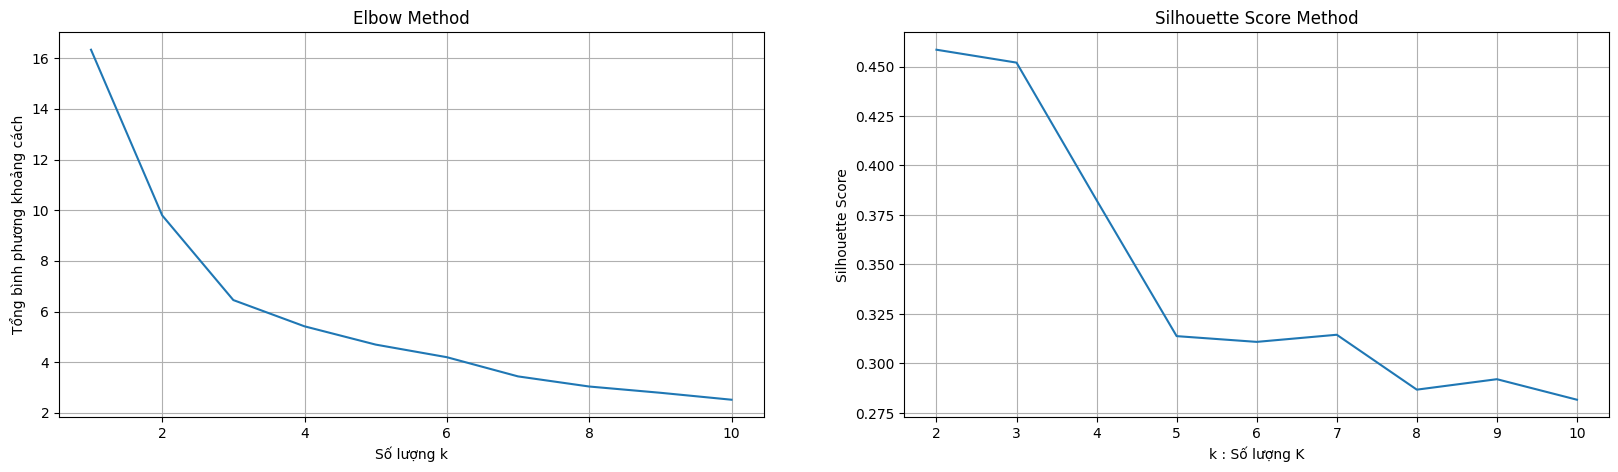

In [148]:
from src.visualization import select_k_for_kmeans
select_k_for_kmeans(df1)


- Bằng phương pháp khủy tay và độ phân biệt thì k = 3 có thể phân biệt rõ các cụm nên chọn k = 3

In [149]:
from src.clustering import get_compose
pipe1 = get_compose(
    df,
    use_pca = False , 
    use_kmean= True , 
    n_clusters= 3
)
pipe1

,steps,"[('feature_engineering', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function fea...002D78A577740>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None



Đã tạo ra các đặc trưng mới


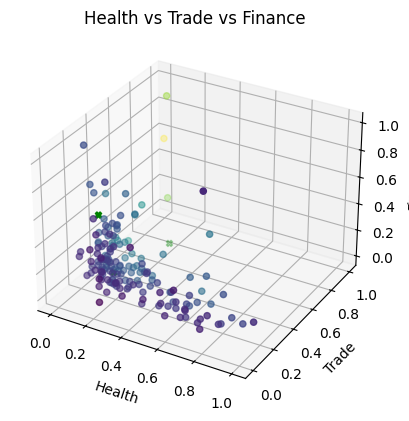

In [150]:
pipe1.fit(df)
labels = pipe1.named_steps["kmean"].labels_
cluster = pipe1.named_steps["kmean"].cluster_centers_
centroids = np.array(cluster)
df['Class'] = labels 
df1['Class'] = labels 

fig = plt.figure()
ax = fig.add_subplot(111 , projection = "3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="g")
ax.scatter3D(x , y , z , c = y)
plt.title("Health vs Trade vs Finance")
ax.set_xlabel("Health")
ax.set_ylabel("Trade")
ax.set_zlabel("Finance")
plt.show()



In [151]:
print(pipe1.named_steps['preprocess'])

ColumnTransformer(transformers=[('mms', MinMaxScaler(),
                                 ['Trade', 'Finance', 'Health'])])


- Không xác định được
- Vẽ tỷ lệ tử vong và thu nhập để phân cụm

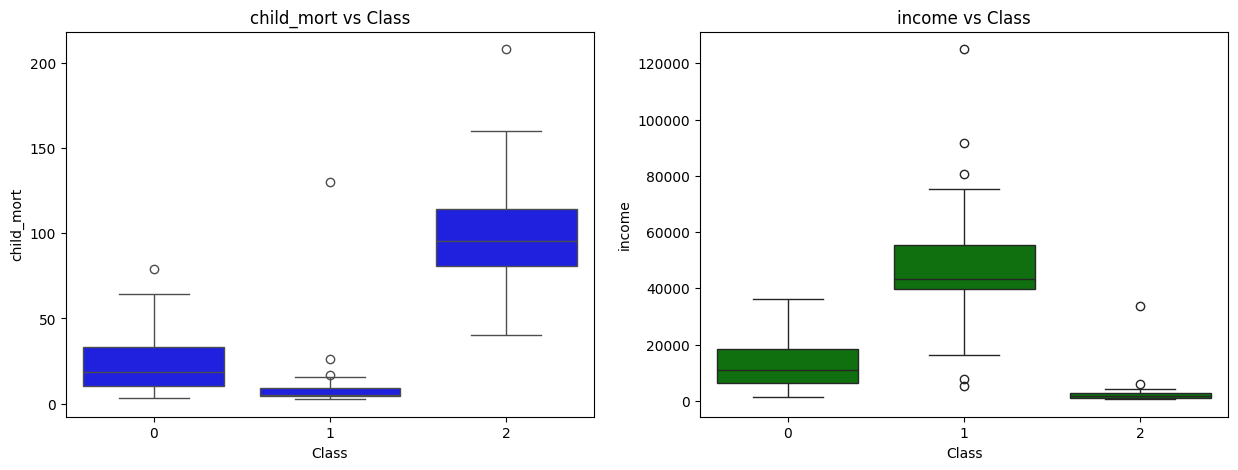

In [152]:
from src.visualization import plot_boxplot_by_class 
plot_boxplot_by_class(df)

## Từ biểu đồ trên
- 0 :Có thể cần hộ trợ nếu đủ ngân sách
- 2 :Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao
- 1 :Không cần phải hỗ trợ

In [153]:
df_result = df1.copy(deep= True)

In [154]:
df1['Class'].loc[df1['Class'] == 0] = 'Có thể cần hỗ trợ'
df1['Class'].loc[df1['Class'] ==1] = 'Không cần hỗ trợ'
df1['Class'].loc[df1['Class'] ==2] = 'Rất cần hỗ trợ' 

In [155]:
df1['Class'].value_counts()

Class
Có thể cần hỗ trợ    102
Rất cần hỗ trợ        36
Không cần hỗ trợ      29
Name: count, dtype: int64

In [156]:
from sklearn.metrics import silhouette_score

In [157]:
res = []
score = silhouette_score(df1.drop("Class" , axis = 1) , labels ,metric="euclidean")
final = df1["Class"].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)
res

[{'Có thể cần hỗ trợ': 102,
  'Rất cần hỗ trợ': 36,
  'Không cần hỗ trợ': 29,
  'silhouette_score': 0.45197076714375445}]

## Apply PCA vs Kmeans

In [158]:
from src.data_preprocessing import use_preprocesing
pca_df = use_preprocesing(df_use , use_pca= True)
print(pca_df)

{'df':             0         1         2         3         4         5         6  \
0    0.220482  0.640048  0.086112 -0.051960  0.037643 -0.058159 -0.075908   
1   -0.080903 -0.172000 -0.208695  0.086004 -0.015168 -0.010271  0.043997   
2   -0.961283 -0.125199 -0.126719 -0.052972  0.099536  0.031897  0.045097   
3   -1.505914  0.472144  0.284978 -0.073150  0.091937  0.040967  0.072901   
4   -0.264724 -0.237308 -0.059150  0.078788  0.032929 -0.056938  0.009745   
..        ...       ...       ...       ...       ...       ...       ...   
162 -0.584662  0.089055 -0.023372  0.114258  0.006163 -0.061840 -0.115437   
163 -0.689176 -0.151368 -0.165444 -0.182571  0.119601  0.297074 -0.003919   
164  0.012693 -0.123744 -0.023656  0.300533  0.041350  0.086888  0.039976   
165 -0.628317  0.259154 -0.017196 -0.075314  0.148962  0.059920 -0.012153   
166 -0.394240  0.534131  0.107048 -0.053492 -0.021568  0.018362 -0.138269   

            7         8  
0   -0.043013  0.024713  
1   -0.028919  0

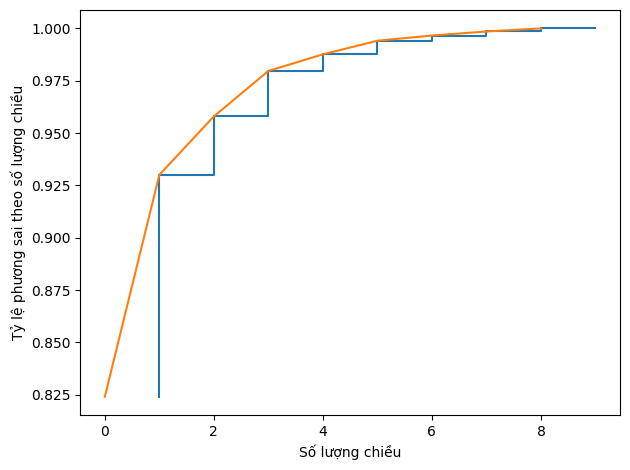

In [159]:
from src.visualization import select_components_pca 
select_components_pca(pca_df['explained_variance_radio'])

- k = 2 có thể giải thích được hơn 92% phương sai =>> chọn

In [160]:
pca_df_result = pca_df['df'][[0,1,2]]
pca_df_result.head()

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150


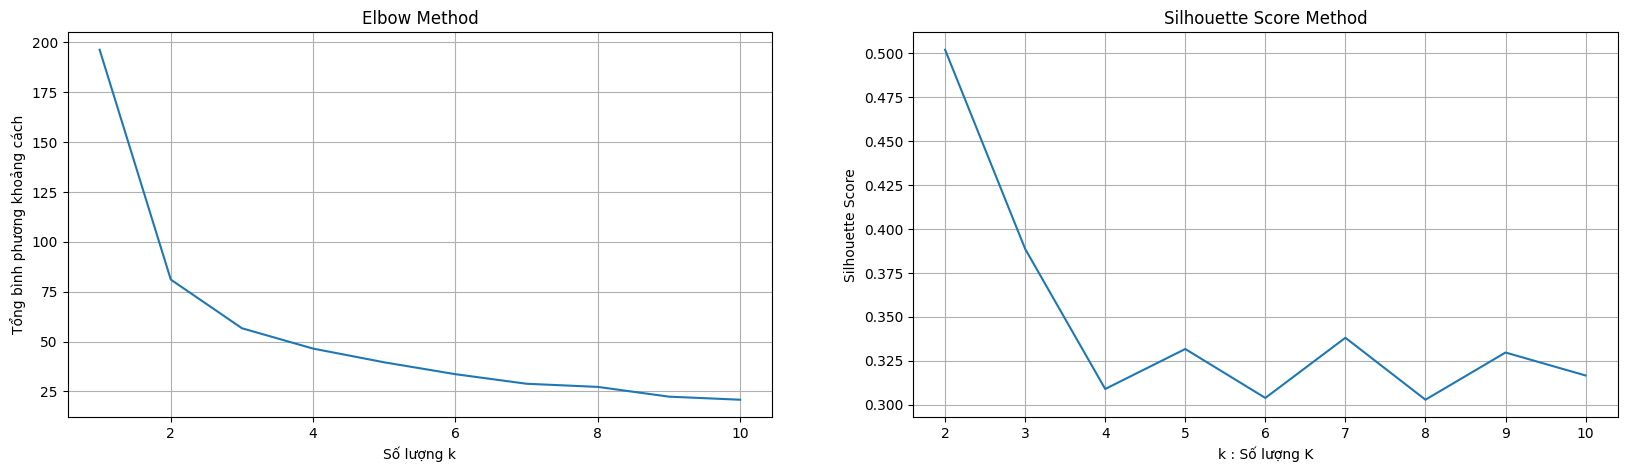

In [161]:
from src.visualization import select_k_for_kmeans
select_k_for_kmeans(pca_df_result)

- Chọn k = 3 là tốt nhất qua biểu đồ trên

In [162]:
std_cols = ["health"]
mms_cols = list(df_use.select_dtypes(include= np.number).columns)

In [163]:
from src.clustering import get_compose
pipe2 = get_compose(use_pca = True , std_cols= std_cols , mms_cols= mms_cols , use_kmean= True , n_clusters= 3)
pipe2

,steps,"[('preprocess', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('std', ...), ('mms', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [164]:
pipe2.fit(df_use)

,steps,"[('preprocess', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('std', ...), ('mms', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


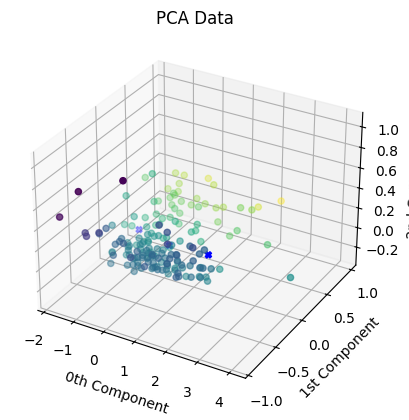

In [165]:
cluster = pipe2.named_steps["kmean"].cluster_centers_
centroids = np.array(cluster)
labels = pipe2.named_steps["kmean"].labels_
df["Class"] = labels 
pca_df_result["Class"] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(centroids[: , 0] , centroids[: , 1] , centroids[:,2] , marker = "X" , color ='b')
x = np.array(pca_df_result[0])
y = np.array(pca_df_result[1])
z = np.array(pca_df_result[2])
plt.title("PCA Data")
ax.set_xlabel("0th Component")
ax.set_ylabel("1st Component")
ax.set_zlabel("2nd Component")
ax.scatter(x, y, z, c=y)
plt.show()

- Không phân biệt được cụm nào với cụm nào vẽ child_mort và income để gán cụm

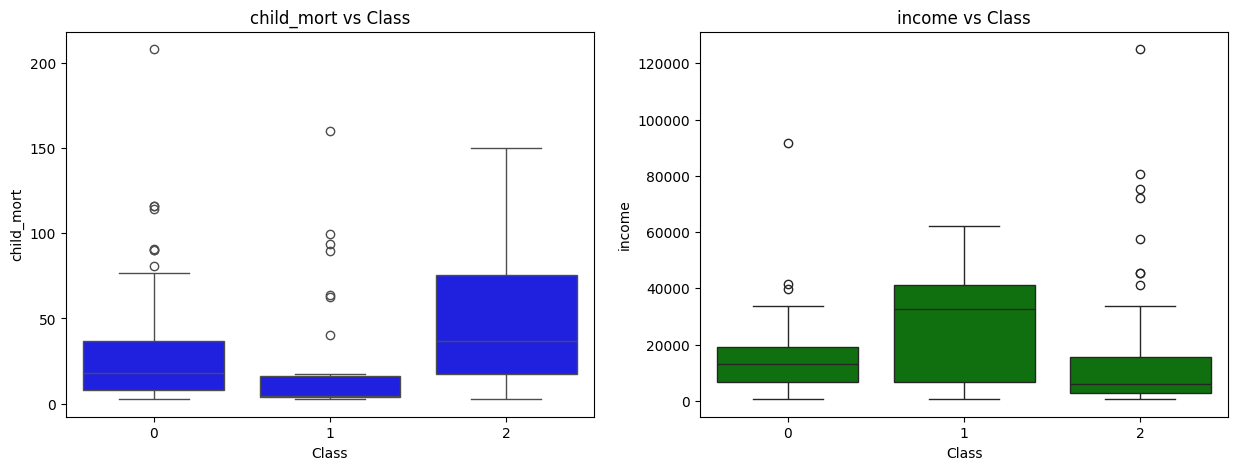

In [166]:
from src.visualization import plot_boxplot_by_class
plot_boxplot_by_class(df)

## Từ biểu đồ trên
- 0 :Có thể cần hộ trợ nếu đủ ngân sách
- 2 :Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao
- 1 :Không cần phải hỗ trợ

In [167]:

pca_df_result['Class'].loc[pca_df_result['Class'] == 0] = 'Có thể cần hỗ trợ'
pca_df_result['Class'].loc[pca_df_result['Class'] ==1] = 'Không cần hỗ trợ'
pca_df_result['Class'].loc[pca_df_result['Class'] ==2] = 'Rất cần hỗ trợ' 

In [168]:
score = silhouette_score(pca_df['df'][[0,1,2]] , labels ,metric="euclidean")
final = pca_df_result['Class'].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)
res

[{'Có thể cần hỗ trợ': 102,
  'Rất cần hỗ trợ': 36,
  'Không cần hỗ trợ': 29,
  'silhouette_score': 0.45197076714375445},
 {'Rất cần hỗ trợ': 72,
  'Có thể cần hỗ trợ': 62,
  'Không cần hỗ trợ': 33,
  'silhouette_score': 0.3886965893321663}]

In [169]:
df1['Class']

0         Rất cần hỗ trợ
1      Có thể cần hỗ trợ
2      Có thể cần hỗ trợ
3         Rất cần hỗ trợ
4      Có thể cần hỗ trợ
             ...        
162    Có thể cần hỗ trợ
163     Không cần hỗ trợ
164    Có thể cần hỗ trợ
165    Có thể cần hỗ trợ
166       Rất cần hỗ trợ
Name: Class, Length: 167, dtype: object

## Apply Hierarchical Clustering

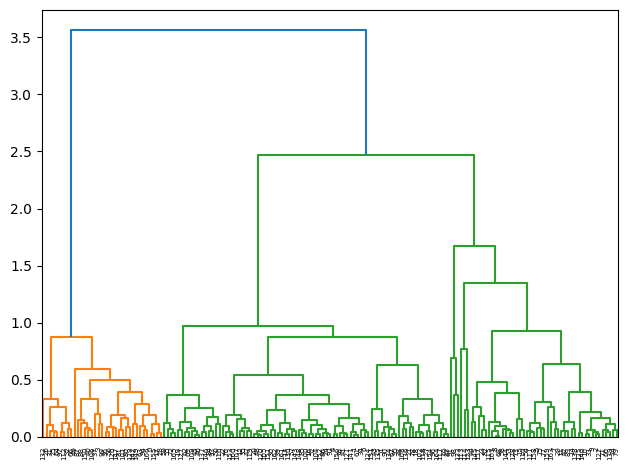

In [170]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_df = linkage(df1.drop("Class" , axis = 1), method = 'ward', metric = 'euclidean')
dendrogram(linkage_df)
plt.tight_layout()
plt.show()

- Chọn k - 3 là hợp lý nhất 

In [171]:
from src.clustering import get_compose

In [172]:
pipe3 = get_compose(
    df_use,
    use_pca = False , 
    use_agglomerative= True
)

In [173]:
pipe3.fit(df)


Đã tạo ra các đặc trưng mới


,steps,"[('feature_engineering', ...), ('preprocess', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function fea...002D78A577740>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


[1 2 0]


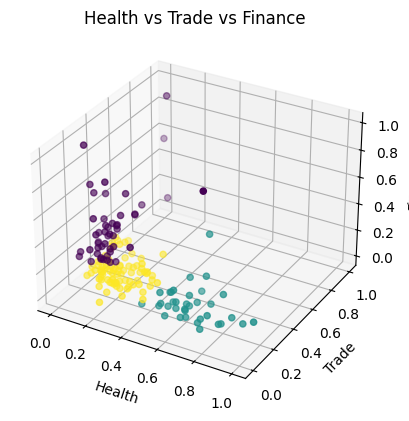

In [174]:
preg_agc = pd.Series(pipe3.named_steps["agglo"].labels_)
print(preg_agc.unique())
df["Class"] = preg_agc
df1["Class"] = preg_agc
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter(x,y,z,c = df1['Class'])
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show()

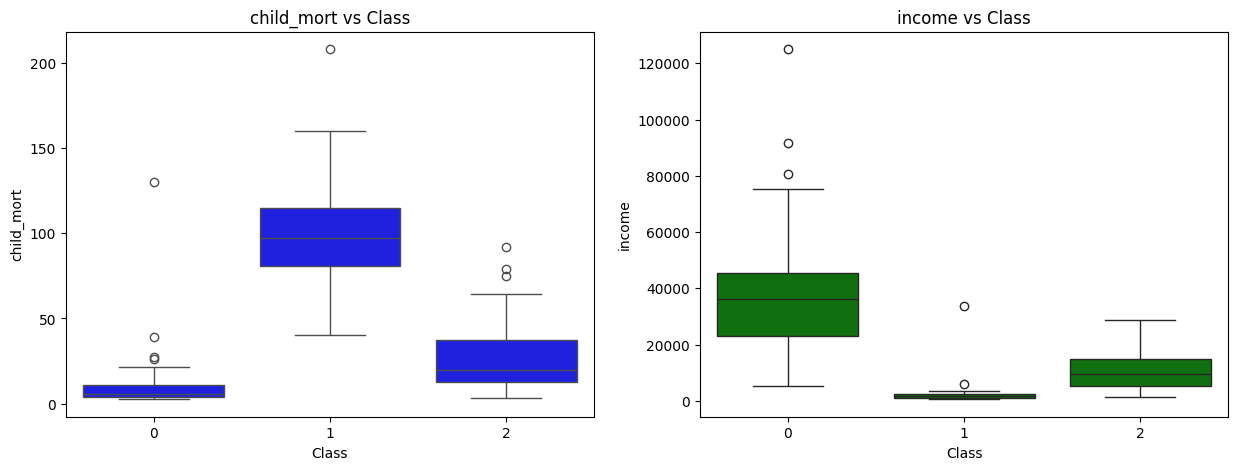

In [175]:
from src.visualization import plot_boxplot_by_class
plot_boxplot_by_class(df)

## Từ biểu đồ trên
- 0 :Không cần hỗ trợ
- 1 :Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao
- 2 :Có thể cần hỗ trợ

In [176]:
df1['Class'].loc[df1['Class'] == 0] = 'Không cần hỗ trợ'
df1['Class'].loc[df1['Class'] ==1] = 'Rất cần hỗ trợ'
df1['Class'].loc[df1['Class'] ==2] = 'Có thể cần hỗ trợ' 

In [177]:
score = silhouette_score(df1.drop("Class" , axis = 1), preg_agc, metric='euclidean')
final = df1["Class"].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)

In [178]:
res

[{'Có thể cần hỗ trợ': 102,
  'Rất cần hỗ trợ': 36,
  'Không cần hỗ trợ': 29,
  'silhouette_score': 0.45197076714375445},
 {'Rất cần hỗ trợ': 72,
  'Có thể cần hỗ trợ': 62,
  'Không cần hỗ trợ': 33,
  'silhouette_score': 0.3886965893321663},
 {'Có thể cần hỗ trợ': 83,
  'Không cần hỗ trợ': 49,
  'Rất cần hỗ trợ': 35,
  'silhouette_score': 0.37795779229139226}]

## Apply Hierarchical Clustering vs PCA

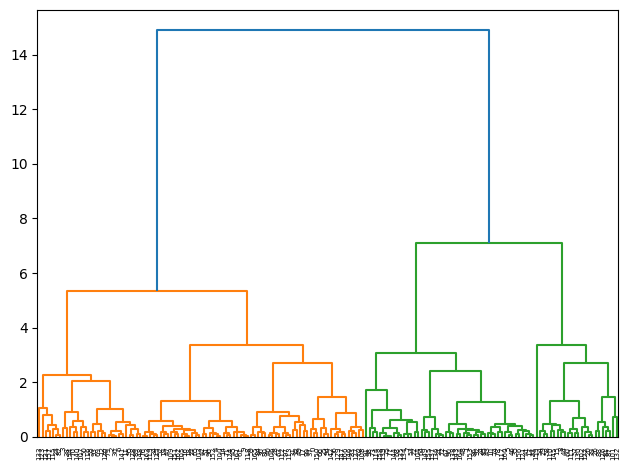

In [179]:
from src.clustering import get_compose
from scipy.cluster.hierarchy import dendrogram , linkage
linkage_df = linkage(pca_df_result.drop("Class" , axis = 1) , method = 'ward' , metric = "euclidean")
dendrogram(linkage_df)
plt.tight_layout()
plt.show()

- Từ biểu đồ trên chọn k = 4 là hợp lý nhất

In [180]:
pipe4 = get_compose(
    std_cols = std_cols , 
    mms_cols = mms_cols , 
    use_pca= True , 
    use_agglomerative=True , 
    n_clusters=4
)
pipe4

,steps,"[('preprocess', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('std', ...), ('mms', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [181]:
pipe4.fit(df_use.drop('country' , axis = 1))

,steps,"[('preprocess', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('std', ...), ('mms', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [182]:
pipe4.named_steps

{'preprocess': ColumnTransformer(transformers=[('std', StandardScaler(), ['health']),
                                 ('mms', MinMaxScaler(),
                                  ['child_mort', 'exports', 'health', 'imports',
                                   'income', 'inflation', 'life_expec',
                                   'total_fer', 'gdpp'])]),
 'pca': PCA(n_components=3),
 'agglo': AgglomerativeClustering(n_clusters=4)}

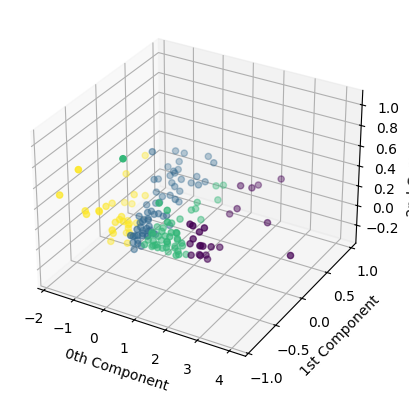

In [183]:
preg_agc = pd.Series(pipe4.named_steps['agglo'].labels_)
df["Class"] = preg_agc 
pca_df_result["Class"] = preg_agc 
fig = plt.figure()
ax = fig.add_subplot(111 , projection = "3d")
x = np.array(pca_df_result[0])
y = np.array(pca_df_result[1])
z = np.array(pca_df_result[2])
ax.scatter(x , y , z , c = pca_df_result["Class"])
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

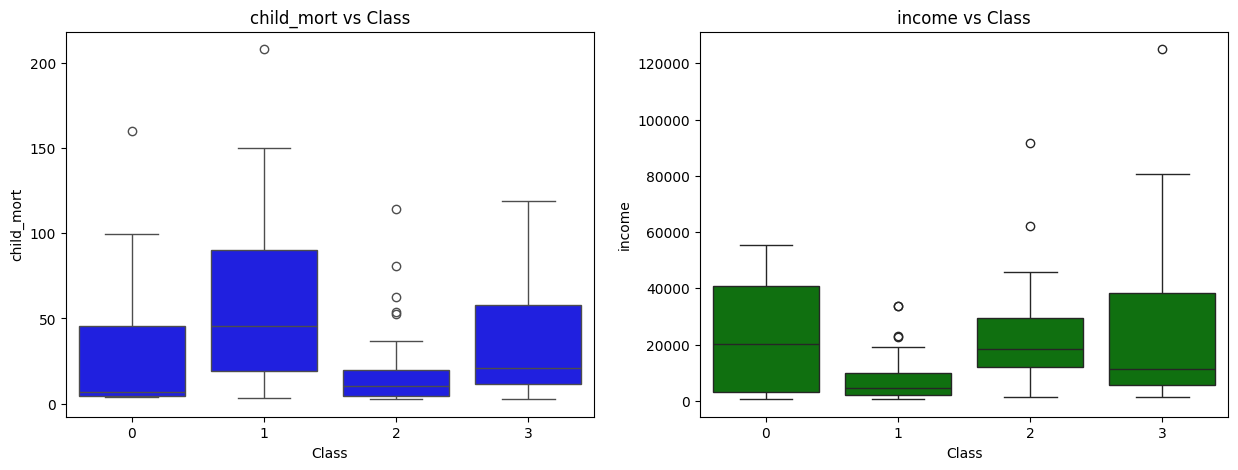

In [184]:
from src.visualization import plot_boxplot_by_class
plot_boxplot_by_class(df)

## Từ biểu đồ trên
- 0 :rất cần hỗ trợ
- 2 :Cần hộ trợ
- 1 Có thể không cần hỗ trợ
- 3 : có thể cần hỗ trợ

In [185]:
pca_df_result["Class"].loc[pca_df_result["Class"] == 0] = "Rất cần hỗ trợ"
pca_df_result["Class"] = pca_df_result["Class"].apply(lambda x : "Có thể cần hỗ trợ" if x in [2,3] else x)
pca_df_result["Class"].loc[pca_df_result["Class"] == 1] = "Không cần hỗ trợ"

In [186]:
score = silhouette_score(pca_df_result.drop("Class" , axis = 1) , preg_agc ,metric="euclidean")
final = pca_df_result["Class"].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)

In [187]:
result = pd.DataFrame(res , index=["Kmean_Feature_Combination", 'Kmean_PCA' , 'Hierarchical_Feature_Combination', 'Hierarchical_PCA'])
result

,Có thể cần hỗ trợ,Rất cần hỗ trợ,Không cần hỗ trợ,silhouette_score
Kmean_Feature_Combination,102,36,29,0.451971
Kmean_PCA,62,72,33,0.388697
Hierarchical_Feature_Combination,83,35,49,0.377958
Hierarchical_PCA,79,24,64,0.340138


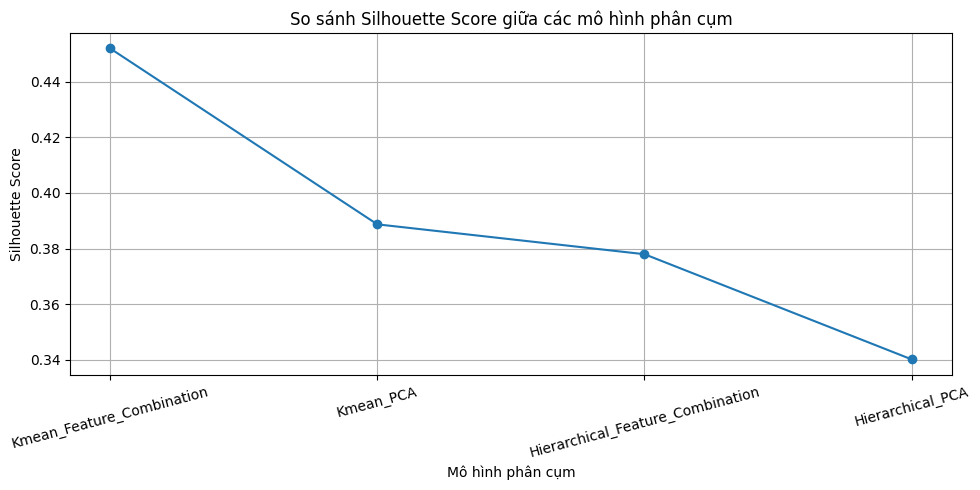

,Có thể cần hỗ trợ,Rất cần hỗ trợ,Không cần hỗ trợ,silhouette_score
Kmean_Feature_Combination,102,36,29,0.451971
Kmean_PCA,62,72,33,0.388697
Hierarchical_Feature_Combination,83,35,49,0.377958
Hierarchical_PCA,79,24,64,0.340138


In [188]:
import matplotlib.pyplot as plt

labels = ["Kmean_Feature_Combination", "Kmean_PCA", "Hierarchical_Feature_Combination", "Hierarchical_PCA"]
scores = result["silhouette_score"]  # đảm bảo đây là list hoặc Series

plt.figure(figsize=(10, 5))
plt.plot(labels, scores, marker='o')
plt.xlabel("Mô hình phân cụm")
plt.ylabel("Silhouette Score")
plt.title("So sánh Silhouette Score giữa các mô hình phân cụm")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()
result

## Nhận xét 
- Tập dữ liệu sạch
- Mô hình pipe1 Tốt nhất thể hiện qua sihoutte_score = 0.45 
- Các mô hình sau không tốt bằng 
* => Chọn mô hình Kmean_Feature_Combination

In [189]:
parent_dir = os.path.dirname(os.getcwd())
model_dir = os.path.join(parent_dir, "model")
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "model.pkl")
import joblib 
joblib.dump(pipe1, model_path)
print(f"Pipeline đã được lưu tại: {model_path}")

Pipeline đã được lưu tại: c:\Country_Clustering_Project_CNS\model\model.pkl


In [190]:
os.path.dirname(os.getcwd())
os.path.join(os.path.dirname(os.getcwd()) , 'model')

'c:\\Country_Clustering_Project_CNS\\model'

In [191]:
import pandas as pd

data_dict = {
    'country': ['Antigua and Barbuda'],
    'child_mort': [10.3],
    'exports': [45.5],
    'health': [6.03],
    'imports': [58.9],
    'income': [19100],
    'inflation': [1.44],
    'life_expec': [76.8],
    'total_fer': [2.13],
    'gdpp': [12200]
}

df_test = pd.DataFrame(data_dict)

In [192]:
model_path = os.path.join(os.path.dirname(os.getcwd()), 'model', 'model.pkl')
model = joblib.load(model_path)
model.predict(df_test)


Đã tạo ra các đặc trưng mới


array([0], dtype=int32)

In [194]:
columns = [
    "child_mort", "exports", "health", "imports",
    "income", "inflation", "life_expec", "total_fer", "gdpp"
]

# In min và max cho từng cột
for col in columns:
    print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")

child_mort: min = 2.6, max = 208.0
exports: min = 0.109, max = 200.0
health: min = 1.81, max = 17.9
imports: min = 0.0659, max = 174.0
income: min = 609, max = 125000
inflation: min = -4.21, max = 104.0
life_expec: min = 32.1, max = 82.8
total_fer: min = 1.15, max = 7.49
gdpp: min = 231, max = 105000
